# Sentiment Analysis

This code performs sentiment analysis on text data from a JSON file using both VADER and TextBlob, combines their results, classifies the text as positive, negative, or neutral, and then visualizes the sentiment distribution with a pie chart.

In [ ]:
import json
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from PIL import Image
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')

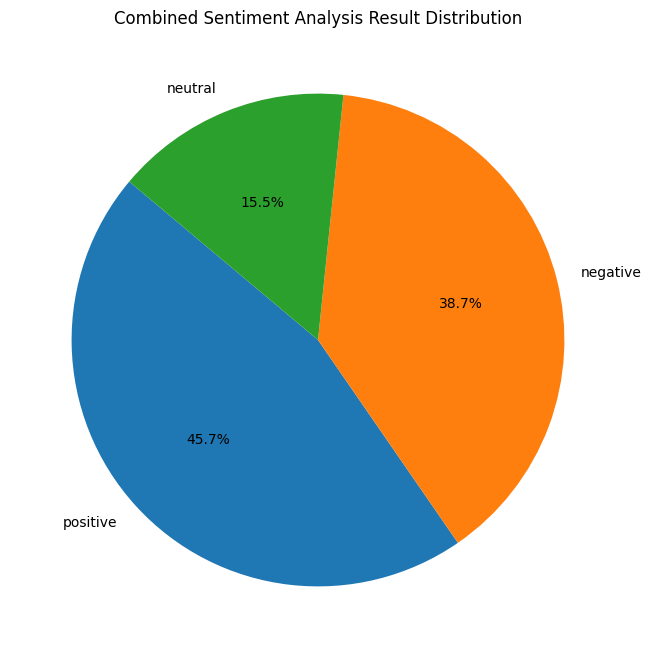

                                                    body  vader_score  \
0                               curl thumbnail now image       0.0000   
1      voice sound right watch enough know damn ben s...      -0.5719   
2      listen podcast twice week yeah really accurate...       0.2732   
3      it way around imagine able prove accused judge...       0.0772   
4      it prove video either keepsake absolutely fuck...      -0.8593   
...                                                  ...          ...   
17554                            chance people exist lot       0.2500   
17555                          unrealistic perfect teeth       0.5719   
17556  play day studio use remade model template crea...       0.7506   
17557                                         zoom built       0.0000   
17558  think amazing quickly change ugly person beaut...       0.9217   

       textblob_score combined_sentiment  
0            0.000000            neutral  
1            0.137143           negat

In [ ]:
file_path = '/content/drive/My Drive/deepfake/Processed_deepfake.json'
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

body_texts = [item['body'] for item in data]

df = pd.DataFrame(body_texts, columns=['body'])

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_analysis(text):
    score = analyzer.polarity_scores(text)['compound']
    return score

def textblob_sentiment_analysis(text):
    polarity = TextBlob(text).sentiment.polarity
    return polarity

def combined_sentiment_analysis(text, vader_weight=0.5, textblob_weight=0.5):
    vader_score = vader_sentiment_analysis(text)
    textblob_score = textblob_sentiment_analysis(text)
    combined_score = vader_weight * vader_score + textblob_weight * textblob_score
    if combined_score > 0:
        return 'positive'
    elif combined_score < 0:
        return 'negative'
    else:
        return 'neutral'

df['vader_score'] = df['body'].apply(vader_sentiment_analysis)
df['textblob_score'] = df['body'].apply(textblob_sentiment_analysis)
df['combined_sentiment'] = df['body'].apply(combined_sentiment_analysis)

output_file_path = 'sentiment_analysis_combined_results.csv'
df.to_csv(output_file_path, index=False)

combined_sentiment_counts = df['combined_sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(combined_sentiment_counts, labels=combined_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Combined Sentiment Analysis Result Distribution')
plt.show()

print(df)


### Generate word clouds for positive, negative, and neutral sentiments using emoji images.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


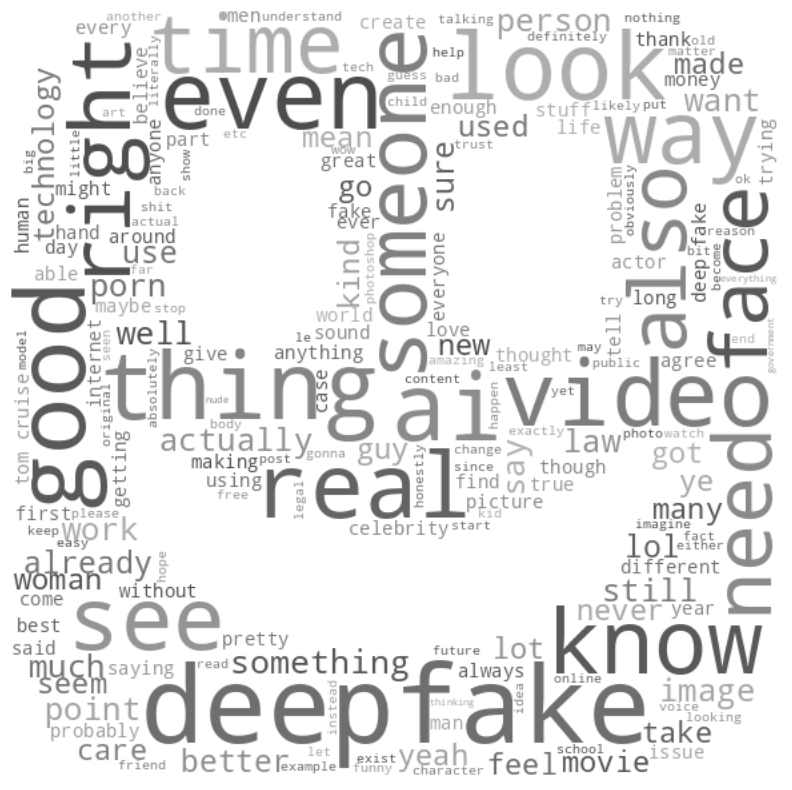

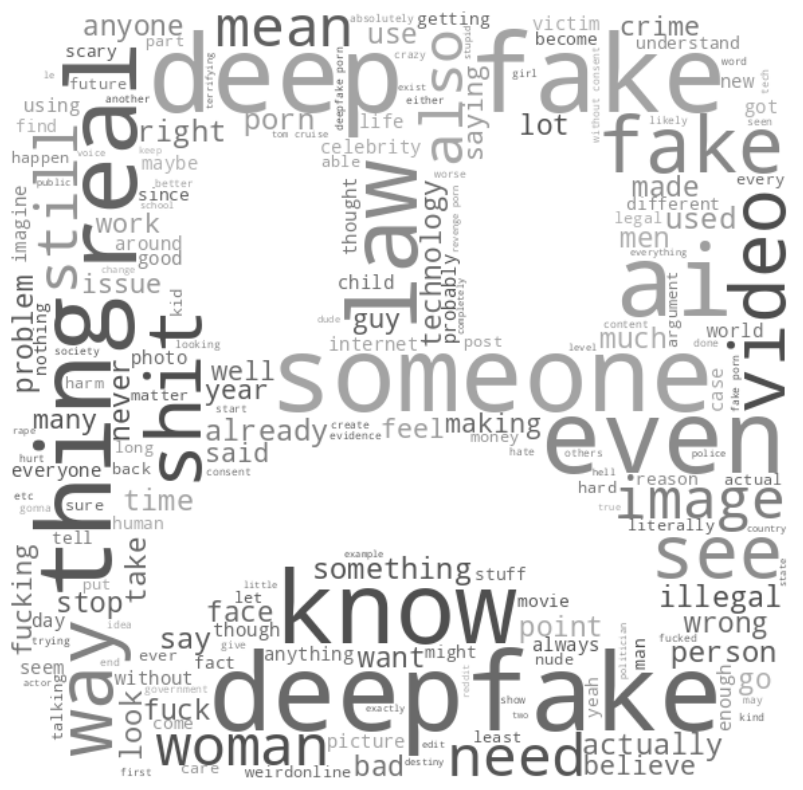

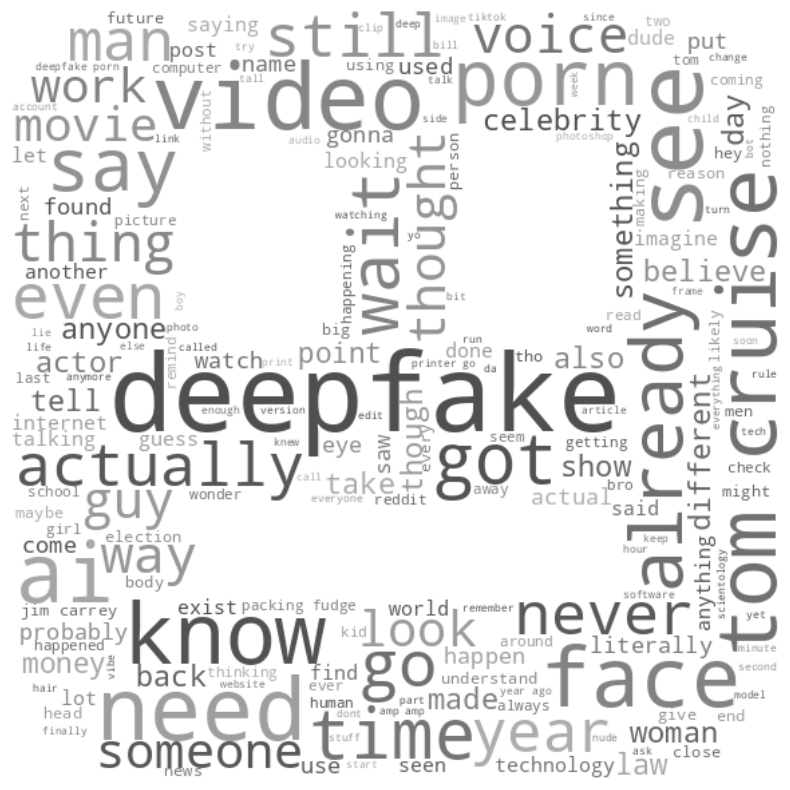

In [ ]:
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

body_texts = [item['body'] for item in data]

df = pd.DataFrame(body_texts, columns=['body'])

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_analysis(text):
    score = analyzer.polarity_scores(text)['compound']
    return score

def textblob_sentiment_analysis(text):
    polarity = TextBlob(text).sentiment.polarity
    return polarity

def combined_sentiment_analysis(text, vader_weight=0.5, textblob_weight=0.5):
    vader_score = vader_sentiment_analysis(text)
    textblob_score = textblob_sentiment_analysis(text)
    combined_score = vader_weight * vader_score + textblob_weight * textblob_score
    if combined_score > 0:
        return 'positive'
    elif combined_score < 0:
        return 'negative'
    else:
        return 'neutral'

df['vader_score'] = df['body'].apply(vader_sentiment_analysis)
df['textblob_score'] = df['body'].apply(textblob_sentiment_analysis)
df['combined_sentiment'] = df['body'].apply(combined_sentiment_analysis)

output_file_path = 'sentiment_analysis_combined_results.csv'
df.to_csv(output_file_path, index=False)

positive_texts = " ".join(df[df['combined_sentiment'] == 'positive']['body'])
negative_texts = " ".join(df[df['combined_sentiment'] == 'negative']['body'])
neutral_texts = " ".join(df[df['combined_sentiment'] == 'neutral']['body'])

smile_mask = np.array(Image.open('/content/positive.png'))
cry_mask = np.array(Image.open('/content/negative.png'))
neutral_mask = np.array(Image.open('/content/neutral.png'))

stopwords = {'people', 'like', 'would', 'one', 'make', 'get', 'think', 'could', 'it', 'going', 'really', "oh", "na", 'gt', 'comment'}

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % np.random.randint(30, 70)

def create_wordcloud(text, title, mask, random_seed):
    wordcloud = WordCloud(width=1600, height=800, background_color='white', mask=mask, max_font_size=80, stopwords=stopwords).generate(text)
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=random_seed), interpolation='bilinear')
    plt.axis('off')
    plt.show()

random_seed = 6666

create_wordcloud(positive_texts, 'Positive Sentiment Word Cloud', smile_mask, random_seed)
create_wordcloud(negative_texts, 'Negative Sentiment Word Cloud', cry_mask, random_seed)
create_wordcloud(neutral_texts, 'Neutral Sentiment Word Cloud', neutral_mask, random_seed)


### Calculate the sentiment distribution for each topic and visualize the results as a stacked horizontal bar chart.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


combined_sentiment  positive  negative   neutral
topic                                           
0                   0.511775  0.300262  0.187963
1                   0.466400  0.425916  0.107684
2                   0.450591  0.257179  0.292230
3                   0.437785  0.413527  0.148687


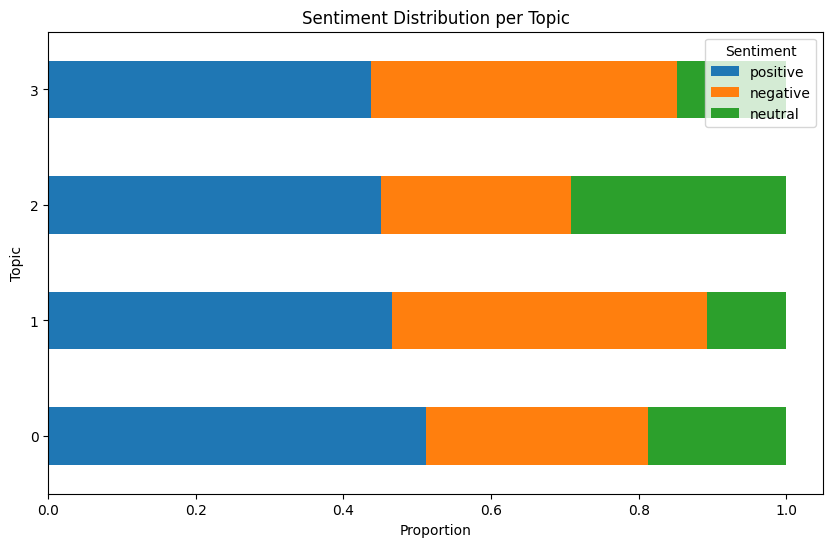

In [ ]:
custom_stop_words = set(stopwords.words('english')).union({
    'people', 'like', 'would', 'one', 'make', 'get', 'think', 'could', 'it', 'going', 'really', "oh", "na", 'gt', 'comment'
})

file_path = '/content/drive/MyDrive/deepfake/Processed_deepfake-0619.json'
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

body_texts = [item['body'] for item in data]

processed_texts = [
    [word for word in word_tokenize(text.lower()) if word.isalnum() and word not in custom_stop_words]
    for text in body_texts
]

dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

num_topics = 4

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=210, passes=20, iterations=400)

topics = lda_model.get_document_topics(corpus)

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_analysis(text):
    score = analyzer.polarity_scores(text)['compound']
    return score

def textblob_sentiment_analysis(text):
    polarity = TextBlob(text).sentiment.polarity
    return polarity

def combined_sentiment_analysis(text, vader_weight=0.5, textblob_weight=0.5):
    vader_score = vader_sentiment_analysis(text)
    textblob_score = textblob_sentiment_analysis(text)
    combined_score = vader_weight * vader_score + textblob_weight * textblob_score
    if combined_score > 0:
        return 'positive'
    elif combined_score < 0:
        return 'negative'
    else:
        return 'neutral'

df = pd.DataFrame(body_texts, columns=['body'])
df['processed_texts'] = processed_texts
df['vader_score'] = df['body'].apply(vader_sentiment_analysis)
df['textblob_score'] = df['body'].apply(textblob_sentiment_analysis)
df['combined_sentiment'] = df['body'].apply(combined_sentiment_analysis)

df['topic'] = [max(topic, key=lambda x: x[1])[0] for topic in topics]

sentiment_distribution = df.groupby('topic')['combined_sentiment'].value_counts(normalize=True).unstack().fillna(0)
sentiment_distribution = sentiment_distribution[['positive', 'negative', 'neutral']]

print(sentiment_distribution)

sentiment_distribution.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.ylabel('Topic')
plt.xlabel('Proportion')
plt.title('Sentiment Distribution per Topic')
plt.legend(title='Sentiment')
plt.show()


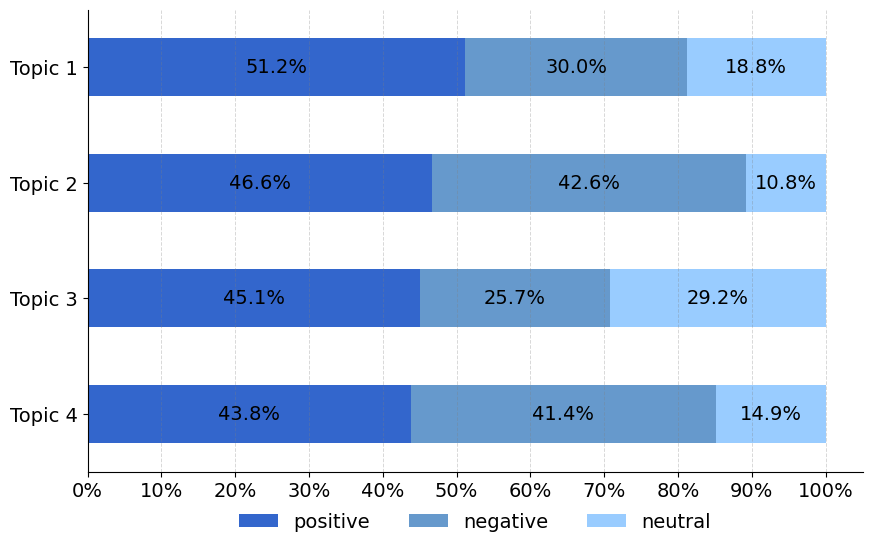

In [1]:
plt.rcParams.update({'font.size': 14})

data = {
    'positive': [0.511775, 0.466400, 0.450591, 0.437785],
    'negative': [0.300262, 0.425916, 0.257179, 0.413527],
    'neutral': [0.187963, 0.107684, 0.292230, 0.148687]
}
index = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4']
df = pd.DataFrame(data, index=index)

df_percentage = df.div(df.sum(axis=1), axis=0) * 100

df_percentage = df_percentage.iloc[::-1]

colors = [ '#3366CC','#6699CC', '#99CCFF']

fig, ax = plt.subplots(figsize=(10, 6))

df_percentage.plot(kind='barh', stacked=True, ax=ax, color=colors)

ax.set_xticks(range(0, 101, 10))
ax.set_xticklabels([f'{i}%' for i in range(0, 101, 10)])
ax.set_xlabel('', fontsize=16)
ax.set_ylabel('', fontsize=16)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False, fontsize=14)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.grid(True, linestyle='--', color='gray', linewidth=0.7, alpha=0.3)
ax.yaxis.grid(False)
plt.savefig('stacked_bar_chart.pdf', format='pdf')
plt.show()
